<a href="https://colab.research.google.com/github/vanessanmd/imersao-dados3-alura/blob/main/imers%C3%A3o_dados_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imersão de Dados 3 - Alura
## Análise de dados 

Fonte: https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip

Check list:
1. Definição do problema
2. Obtenção dos dados
3. Análise exploratória dos dados
4. Conclusão

Desafios Propostos:
* Desafio 01: Investigar porque a classe tratamento é tão desbalanceada.
* Desafio 02: Plotar as cinco últimas linhas da tabela.
* Desafio 03: Proporção da classe tratamento.
* Desafio 04: Quantos tipos de drogas foram investigados.
* Desafio 05: Procurar na documentação o método query(pandas).
* Desafio 06: Renomear as colunas tirando o hífen.
* Desafio 07: Deixar os gráficos bonitos. (Matplotlib.pyplot).
* Desafio 08: Resumo do que foi aprendido com os dados.



## 1. Definição do Problema
Análise de registros de culturas de células que foram submetidas a diferentes drogas, com diferentes dosagens e tempo de exposição.

## 2. Obtenção dos Dados

In [ ]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Carregando o arquivo de dados e gerando o Dataframe

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression='zip')

## 3. Análise Exploratória dos Dados
Cada registro (linha) representa um tratamento medicamentoso.<p>
Dicionário de dados:
* id: identificação do tratamento medicamentoso.
* tratamento: 
  * com_controle: trata-se de experimento controlado, ou seja, apenas um (ou poucos) fatores são alterados a cada vez, enquanto todos os outros são mantidos constantes. Nesse caso, a variável de controle é a droga.
  * com_droga 
* tempo: tempo de exposição das celulas às drogas.
* dose: possivelmente tamanho da dose
* droga: drogas utilizadas 
* g-0 a c-99: identificação dos genes com o resultado da expressão gênica após a cultura de células ter sido submetida ao estímulo, nesse caso, as drogas. Os valores estão normalizados.


In [ ]:
# Visualizando o dataframe (linhas, colunas)
dados.head(5)

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


  ### Desafio 02 - Plotar as ultimas linhas do dataframe

In [ ]:
# Visualizando as últimas linhas do dataframe
dados.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


In [ ]:
# Formato do dataframe (linhas, colunas)
dados.shape

(23814, 877)

Para evitar erros durante execução de querys, as colunas que possuem hífen no nome serão renomeadas apenas eliminando o hífen.

In [ ]:
dados.columns = dados.columns.str.replace('-', '')

In [ ]:
dados

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.

**Conhecendo os valores únicos presentes nas colunas**

In [ ]:
# Analisando a coluna tratamento para saber o valores unicos
dados['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

In [ ]:
# Analisando a coluna tempo para saber o valores unicos
dados['tempo'].unique()

array([24, 72, 48])

In [ ]:
# Analisando a coluna dose para saber o valores unicos
dados['dose'].unique()

array(['D1', 'D2'], dtype=object)

In [ ]:
# Analisando a coluna droga para saber o valores unicos
dados['droga'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

In [ ]:
# Analisando a coluna g0 para saber o valores unicos
dados['g0'].unique()

array([ 1.062 ,  0.0743,  0.628 , ...,  0.3942,  0.666 , -0.8598])

**Verificando a distribuição dos dados**

In [ ]:
# Analisando a coluna tratamento 
dados['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [ ]:
# Verificar a proporção desses dados.
dados['tratamento'].value_counts(normalize=True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

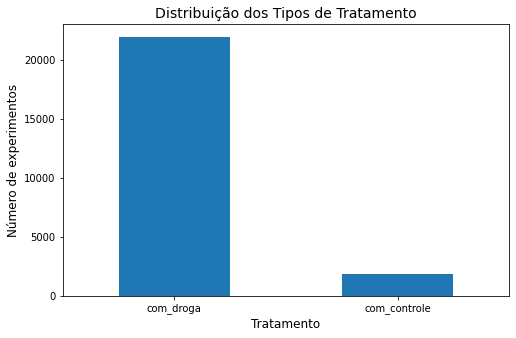

In [ ]:
# Visualisando a coluna tratamento
dados['tratamento'].value_counts().plot.bar(figsize=(8, 5))
plt.title('Distribuição dos Tipos de Tratamento', fontsize=14)
plt.xlabel('Tratamento', fontsize=12)
plt.ylabel('Número de experimentos', fontsize=12)
plt.xticks(rotation=0)
plt.show()

É possível verificar que os dados em tratamento estão desbalanceados. 

### Desafio 01: Investigar porque a classe tratamento é tão desbalanceada.
O desbalanceamento é devido o grupo de controle servir de padrão para comparação com os outros resultados. Então uma amostra é isolada e não será exposta ao tratamento, dessa forma, é possível verificar como ela se desenvolve em relação às que recebem as drogas. <p>
(https://www.ime.unicamp.br/~nancy/Cursos/me172/Cap1_aula.pdf <p>
https://brainly.com.br/tarefa/8165509)

In [ ]:
# Analisando a coluna dose 
dados['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

In [ ]:
dados['dose'].value_counts(normalize=True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

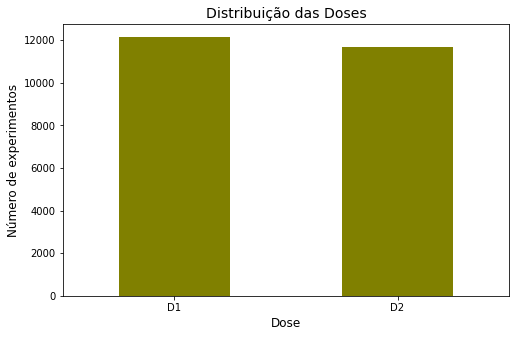

In [ ]:
# Visualisando a coluna dose
dados['dose'].value_counts().plot.bar(figsize=(8, 5), color='olive')
plt.title('Distribuição das Doses', fontsize=14)
plt.xlabel('Dose', fontsize=12)
plt.ylabel('Número de experimentos', fontsize=12)
plt.xticks(rotation=0)
plt.show()

Percebe-se que os tipos de doses forem bem distruibuídas entre as amostras.

### Desafio 03: Proporção da classe tratamento.

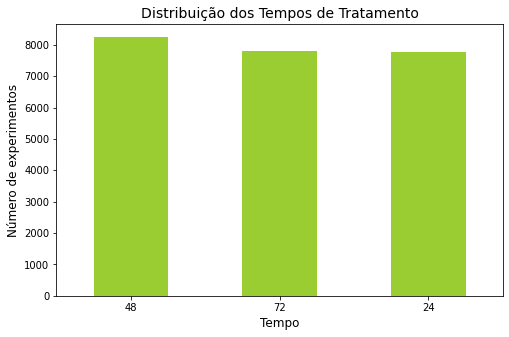

In [ ]:
# Visualisando a coluna tempo
dados['tempo'].value_counts().plot.bar(figsize=(8, 5), color='yellowgreen')
plt.title('Distribuição dos Tempos de Tratamento', fontsize=14)
plt.xlabel('Tempo', fontsize=12)
plt.ylabel('Número de experimentos', fontsize=12)
plt.xticks(rotation=0)
plt.show()

A maior parte dos experimentos teve duração de 48 horas.

### Desafio 04: Quantos tipos de drogas foram investigados.

In [ ]:
# Analisando os tipos de drogas
dados['droga'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
57f5932fb       1
e68b58a8f       1
209a68d23       1
aeb28b1ee       1
40b490d82       1
Name: droga, Length: 3289, dtype: int64

A partir dessa série, verfica-se que foram utilizados 3.289 tipos de drogas, sendo a mais aplicada a que tem identificação "cacb2b860", com 1.866 vezes utilizada em experimentos.

**Na coluna g0, investigar quais valores de expressão gênica estão acima do valor 0?** <p>
Antes disso, quais os valores máximo e mínimo nesse atributo?

In [ ]:
# Valor máximo
dados['g0'].max()

10.0

In [ ]:
# Valor mínimo
dados['g0'].min()

-5.513

In [ ]:
# Quantos valores estão acima de 0?
dados_g0_acima_zero = dados[dados['g0'] > 0]
dados_g0_acima_zero

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,-4.0360,3.6950,1.4530,0.9724,-2.4380,5.1340,-4.6600,5.7960,4.9700,1.5540,2.4790,-3.8010,-1.0230,5.3110,-0.5660,-4.4450,1.2210,1.3750,0.3932,0.3392,4.3510,5.7540,-1.6590,5.3000,5.6050,5.5320,3.7860,0.9197,1.9310,2.4870,...,-0.8904,2.0590,0.5052,0.6890,0.5340,0.5135,0.6507,0.9838,0.4532,-0.3212,0.2662,0.6864,1.6300,1.3810,0.0061,0.2908,0.2598,0.1266,-0.3526,1.1750,-1.1030,1.3650,1.0610,0.4034,1.0880,-0.4230,0.4013,0.1726,0.7464,0.9418,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23807,id_fff7e6992,com_droga,48,D1,a28556d51,0.1420,-0.3696,-0.0093,-0.2495,-0.0175,0.0959,-0.2201,0.2443,0.4879,0.3432,0.4151,0.9056,0.3538,0.5246,-0.4441,-0.1605,-0.3720,-0.5619,-0.1409,0.1255,0.1214,-0.1975,-0.4367,0.0000,0.4301,-0.7606,-0.0248,0.0270,-0.0367,-1.2480,0.0559,-0.0984,0.5537,0.1063,0.3893,...,0.5554,0.2225,-0.0903,0.9227,-0.0460,0.3756,1.0730,-0.

De um total de 23.814 registros, 11.769 possuem valores acima de 0.

### Desafio 05: Procurar na documentação o método query(pandas).
Abaixo é feita uma query (consulta) aos valores de expressão gênica que estão acima do valor 1.


In [ ]:
# Quantos valores estão acima de 1?
dados.query('g0 > 1')

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.062,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.044,1.7000,-1.5390,5.9440,-2.1670,-4.0360,3.6950,1.4530,0.9724,-2.4380,5.1340,-4.6600,5.7960,4.9700,1.5540,2.4790,-3.8010,-1.0230,5.3110,-0.5660,-4.4450,1.2210,1.3750,0.3932,0.3392,4.3510,5.7540,-1.6590,5.3000,5.6050,5.5320,3.7860,0.9197,1.9310,2.4870,...,-0.8904,2.0590,0.5052,0.6890,0.5340,0.5135,0.6507,0.9838,0.4532,-0.3212,0.2662,0.6864,1.6300,1.3810,0.0061,0.2908,0.2598,0.1266,-0.3526,1.1750,-1.1030,1.3650,1.0610,0.4034,1.0880,-0.4230,0.4013,0.1726,0.7464,0.9418,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
16,id_002fb9c19,com_droga,48,D1,87d714366,8.738,0.1914,2.4380,-0.2930,3.2010,1.4910,5.3920,-1.0420,-8.4860,-2.5790,-6.7470,3.6150,-1.4510,0.6909,-0.7623,-2.9400,-9.2850,-6.7110,-0.4195,1.1600,-1.3180,1.3660,-1.4020,-2.6220,0.7204,-2.5930,-4.0630,-0.8282,-3.5000,0.9206,-5.1450,9.8040,-2.6840,-2.4390,-0.1427,...,-10.0000,-9.5910,-10.0000,-10.0000,-8.5110,-10.0000,-10.0000,-10.0000,-10.0000,-8.8870,-10.0000,-10.0000,-10.0000,-10.0000,-4.9020,-9.9840,-5.5520,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.7960,-8.1770,-9.8990,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840
39,id_0079d45d3,com_droga,24,D1,292ab2c28,1.631,-2.1430,-0.0943,-1.1990,0.4869,-0.0935,1.2090,-3.8910,-1.5450,-2.2870,-2.2040,-0.8888,-1.1730,0.0444,-3.9430,0.1673,-0.9502,-1.1750,0.1686,3.8480,-2.9760,-0.0389,1.6330,-0.0655,1.3810,-2.4340,-1.8040,0.3945,-1.2080,-0.1963,-2.0170,0.6004,-2.5860,-1.4550,-0.4141,...,-1.8210,-1.2440,-2.5430,-6.4260,-2.5320,-4.3570,-4.7560,-0.8781,-3.7800,-1.6340,-3.9660,-1.7890,-3.2480,-2.6720,-1.3250,-2.3430,-3.2220,-2.5160,-2.3410,-2.4620,-3.8760,-2.2450,-3.9450,-1.7400,-4.4320,-3.6740,-2.9810,-4.5770,-1.8620,-1.9120,-2.9240,-5.7720,-1.9360,-2.8860,-2.7680,-2.4840,-2.7020,-2.2530,-4.8360,-0.6461
48,id_008b48693,com_droga,24,D1,5628cb3ee,2.520,-2.0200,1.1710,2.0420,-1.8070,0.5109,-0.4123,0.3247,-1.6950,0.5503,0.1106,0.3894,0.2549,-1.1100,0.5913,0.7150,0.1877,-0.2982,-0.3119,1.3900,-1.0770,-2.3910,0.2645,1.1510,-0.3144,-0.2650,1.3330,-0.9137,-1.0100,0.4513,-0.1749,0.1450,0.2848,-0.1057,-0.1786,...,0.6558,-1.5330,-0.3508,-0.2884,-0.6635,0.5249,0.1877,0.4396,1.3060,0.4115,-0.1007,-1.1510,-0.6386,-0.4182,0.5802,1.0530,-0.1296,0.2485,-0.2013,-0.2202,0.4547,-0.2547,-0.6655,-0.3019,-0.1499,1.5890,-0.5297,-0.2534,-0.5758,-0.1000,-0.6200,0.0071,-0.3901,0.5272,-1.0650,0.0289,-0.2725,-0.1511,-0.4635,-0.1365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23749,id_ff4fcb445,com_droga,48,D1,c451bb4cb,3.288,0.6031,2.2360,-0.3818,-0.9641,0.7706,1.6050,0.0322,1.1880,-0.3739,0.2086,0.5397,0.8429,0.0053,1.2010,-1.6520,-0.5213,1.6200,0.2776,0.2779,0.3236,0.5777,-0.6217,0.6745,-2.4910,0.7219,0.2596,0.7789,0.5403,-0.1943,1.1540,-0.2519

Podemos visualizar a distruibuição dos valores de expressão gênica com um histograma.

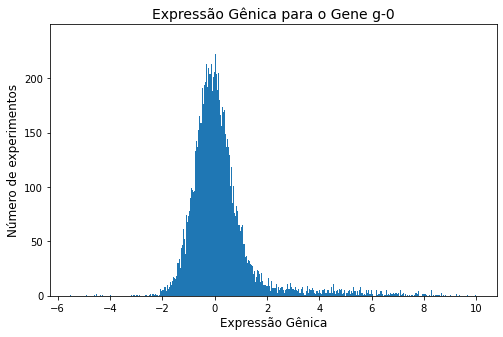

In [ ]:
# Plotando histograma da coluna g0
plt.figure(figsize=(8, 5))
plt.hist(dados['g0'], bins=1000)
plt.title('Expressão Gênica para o Gene g-0', fontsize=14)
plt.xlabel('Expressão Gênica', fontsize=12)
plt.ylabel('Número de experimentos', fontsize=12)
plt.xticks(rotation=0)
plt.show()

Para o gene g-0, é possível ver grande concetração dos resultados variando entra -2 e 2, porém com a maior parte dos dados compostos por valores positivos.

## 4. Conclusão
Esta primeira etapa consistiu de uma análise exploratória dos dados.
Foram identificados os parâmetros envolvidos na pequisa: tratamento, dose, tempo e os genes que foram submetidos aos tratamentos.<p>
Foi possível identificar a partir da análise do atributo tratamento que foi incluído um grupo de controle, sendo este utilizado para comparação com os demais experimentos.